In [2]:
import os
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

In [3]:
import tensorflow as tf
# %tensorflow_version 2.2.0
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)

tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.104.74.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.104.74.242:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
import os
import numpy as np

len(os.listdir('/content/gdrive/MyDrive/glarer_emoved_and_binarized_images/'))

5512

In [7]:
import cv2
import random

folder_name = os.listdir('/content/gdrive/MyDrive/glarer_emoved_and_binarized_images/')
X = list()
y = list()
for i in range(len(folder_name)):
  img = cv2.imread('/content/gdrive/MyDrive/glarer_emoved_and_binarized_images/'+folder_name[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)

  img_ = img.astype('float32')
  # y_img = normalize(img_)
  # y.append(y_img)
  # noisy = normalize(add_gaussian_noise(img_))
  X.append(img_)

In [8]:
test_X = list()
for i in range(len(X)):
  if (i == 431):
    break
  else:
    test_X.append(X[i])
    X.pop(i)

In [9]:
train_X = X 
# train_y = y

train_X = np.array(train_X)

In [10]:
test_X = np.array(test_X)

In [11]:

print("train_X shape: ", train_X.shape)
print("test_X shape: ", test_X.shape)


train_X shape:  (5081, 128, 128)
test_X shape:  (431, 128, 128)


In [12]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

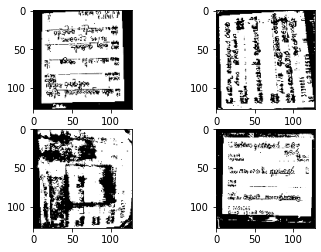

In [13]:
plt.subplot(221)
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_X[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_X[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_X[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [14]:
# train_X = train_X.astype('float32') / 255.
# test_X = test_X.astype('float32') / 255.
# train_X = np.reshape(train_X, (len(train_X), 150, 150, 1))  # adapt this if using `channels_first` image data format
# test_X = np.reshape(test_X, (len(test_X), 150, 150, 1))


train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0
# train_X = train_X.reshape((len(train_X), np.prod(train_X.shape[1:])))
# test_X = test_X.reshape((len(test_X), np.prod(test_X.shape[1:])))

train_X = np.reshape(train_X, (len(train_X), 128, 128, 1))
test_X = np.reshape(test_X, (len(test_X), 128, 128, 1))

In [15]:
print(train_X.shape)
print(test_X.shape)

(5081, 128, 128, 1)
(431, 128, 128, 1)


In [16]:
noise_factor = 0.2
x_train_noisy = train_X + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=train_X.shape)
x_test_noisy = test_X + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=test_X.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [17]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard
from tensorflow.keras.utils import to_categorical

In [18]:
# create the encoder network
input_image = Input(shape=(128, 128,1))
x = Conv2D(32,(3,3),activation='relu',padding='same')(input_image)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

encoder = Model(input_image, encoded)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable par

In [19]:
# create the decoder network
decoder_input= Input(shape=(32,32,32))
x = Conv2D(32,(3,3),activation='relu',padding='same')(decoder_input)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

decoder = Model(decoder_input, decoded)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 32)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 1)       289 

In [22]:
# create the autoencoder by tying the encode and decode networks together
autoencoder_input = Input(shape=(128, 128,1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 model (Functional)          (None, 32, 32, 32)        9568      
                                                                 
 model_1 (Functional)        (None, 128, 128, 1)       18785     
                                                                 
Total params: 28,353
Trainable params: 28,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
# train using the noisy images with their clean counterparts
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, train_X,
  epochs=300,
  batch_size=128,
  shuffle=True)

Epoch 1/300
40/40 [==============================] - 37s 906ms/step - loss: 0.4539
Epoch 2/300
40/40 [==============================] - 35s 876ms/step - loss: 0.2968
Epoch 3/300
40/40 [==============================] - 36s 904ms/step - loss: 0.2655
Epoch 4/300
40/40 [==============================] - 36s 895ms/step - loss: 0.2489
Epoch 5/300
40/40 [==============================] - 36s 898ms/step - loss: 0.2390
Epoch 6/300
40/40 [==============================] - 37s 922ms/step - loss: 0.2309
Epoch 7/300
40/40 [==============================] - 36s 905ms/step - loss: 0.2253
Epoch 8/300
40/40 [==============================] - 37s 915ms/step - loss: 0.2204
Epoch 9/300
40/40 [==============================] - 37s 914ms/step - loss: 0.2168
Epoch 10/300
40/40 [==============================] - 37s 921ms/step - loss: 0.2139
Epoch 11/300
40/40 [==============================] - 37s 914ms/step - loss: 0.2114
Epoch 12/300
40/40 [==============================] - 36s 894ms/step - loss: 0.2090
E

In [24]:
# run the first 10 noisy test images through the encoder
encoded_imgs = encoder.predict(x_test_noisy[:10])
print(encoded_imgs.shape)

# run encoded noisy test images back through the decoder
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

(10, 32, 32, 32)
(10, 128, 128, 1)


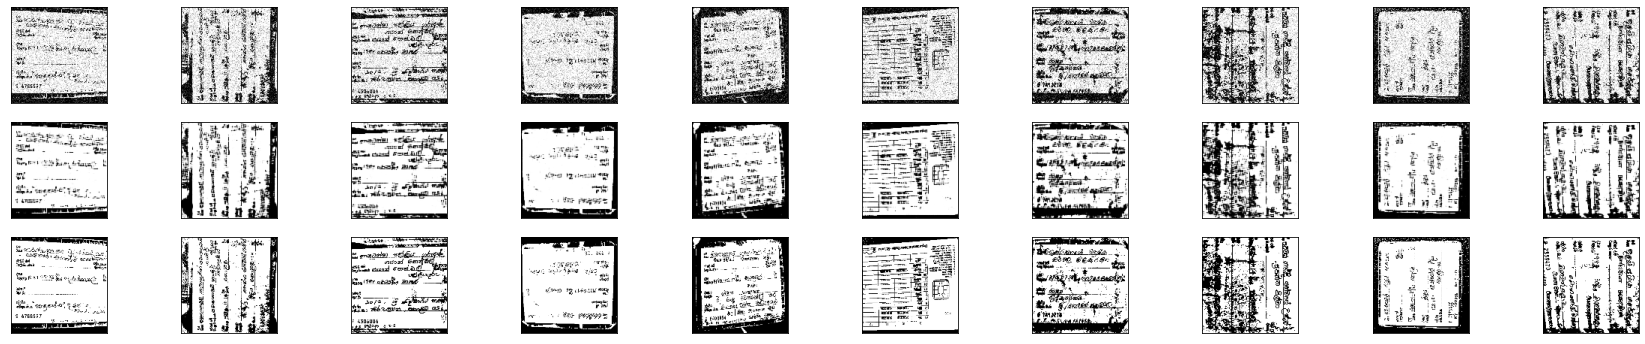

In [29]:
# display the images
n = 10
plt.figure(figsize=(30,6))
for i in range(n):
  # noisy images
  ax = plt.subplot(3,n,i+1)
  plt.imshow(x_test_noisy[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # denoised images
  ax = plt.subplot(3,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # original images
  ax = plt.subplot(3,n,i+1+n*2)
  plt.imshow(test_X[i].reshape(128,128))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()